In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv('train.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
gender_class_survival = df.pivot_table('Survived', ['Pclass', 'Sex'])
print(gender_class_survival)

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


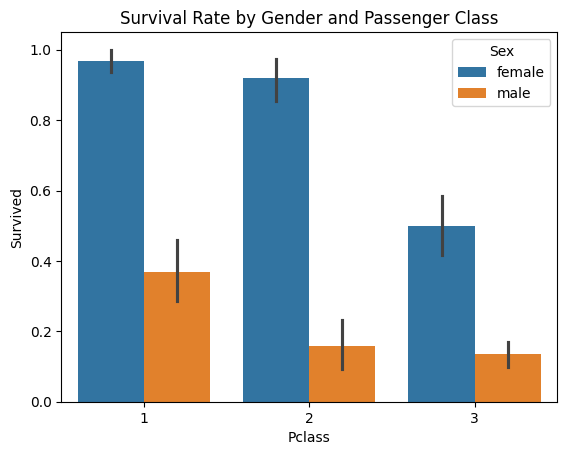

In [7]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

In [ ]:
#You should see clear patterns showing that women had a higher survival rate compared to men.
#Furthermore, first-class passengers generally had a higher survival rate compared to second and third-class passengers.

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySize')['Survived'].mean()
print(family_survival)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


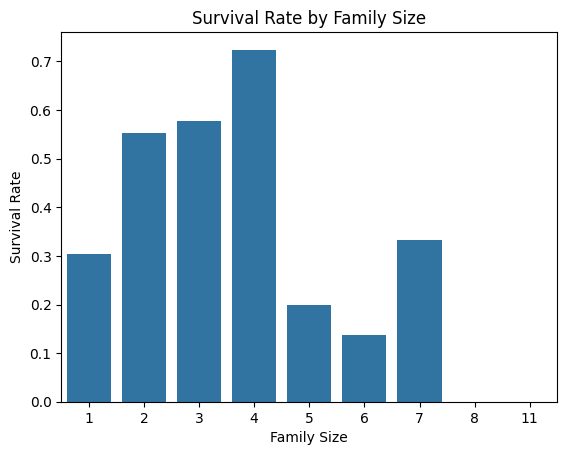

In [9]:
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#You will likely observe that passengers traveling alone (family size = 1) had a lower survival rate compared to those traveling with a family and family having more than 4 members also have low surivial rate
# Family with 6 members had least survival rate compared to others

In [10]:
embarkation_survival = df.groupby('Embarked')['Survived'].mean()

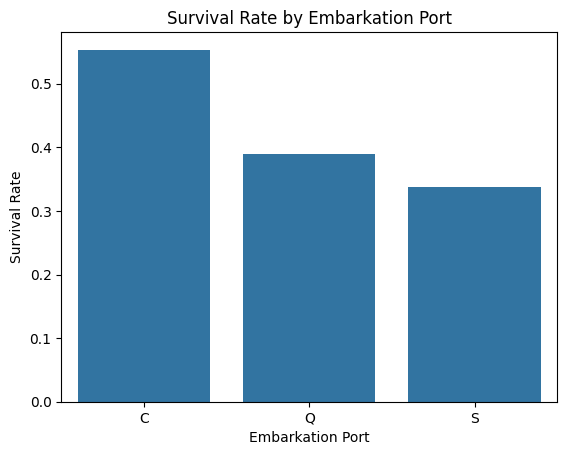

In [11]:
sns.barplot(x=embarkation_survival.index, y=embarkation_survival.values)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


In [ ]:
#You should notice differences in survival rates among the different embarkation ports.
#For instance, passengers who boarded from port "C" had a higher survival rate compared to those who boarded from ports "S" and "Q."

In [12]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_survival = df.groupby('AgeGroup', observed=True)['Survived'].mean()


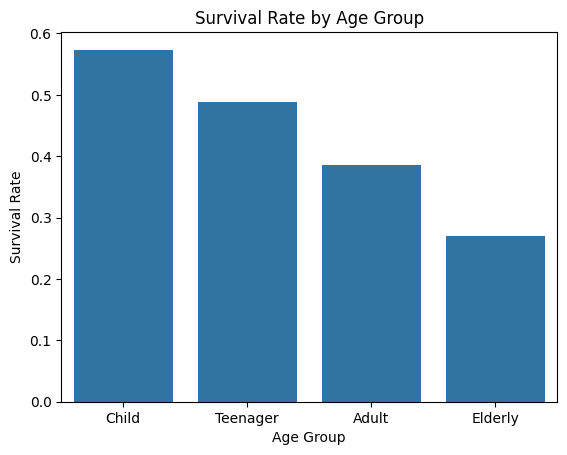

In [13]:
sns.barplot(x=age_group_survival.index, y=age_group_survival.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
#The plot reveal that children (aged 0-12) had a significantly higher survival rate, while elderly passengers had a lower survival rate.

In [ ]:
#Key Insights
#Gender & Class: Women and first-class passengers had higher survival rates.
#Family Size: Traveling alone decreased survival chances, while traveling with family increased survival rates.
#Embarkation Port: The embarkation port did influence survival rates, with port "C" having higher survival rates.
#Age Group: Children had the highest survival rates, while elderly passengers had the lowest survival chances.

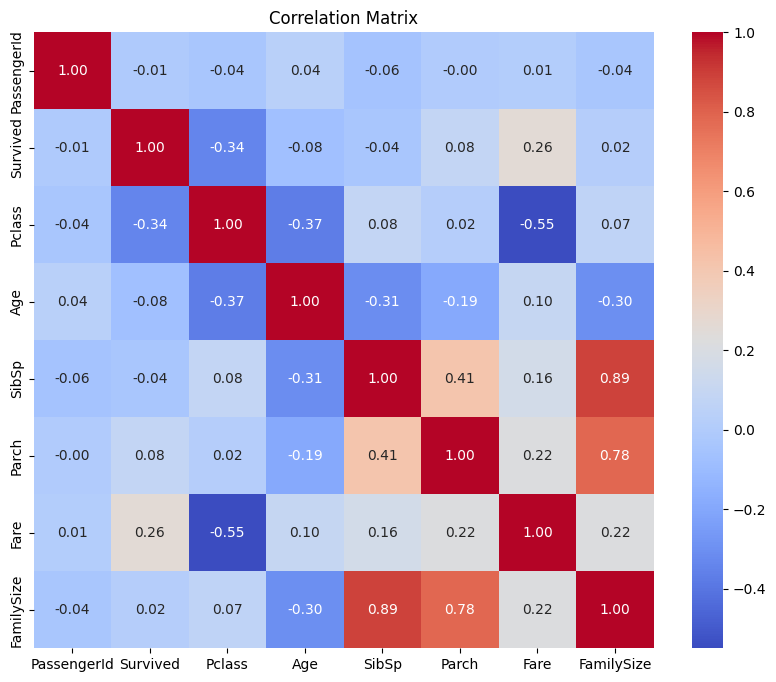

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Handling Missing Values**

In [15]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts()


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [16]:
df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])
median_age = df.Age.median()
df.Age.fillna(median_age, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Fare'] = df['Fare'].replace(0, df['Fare'].median())


<ipython-input-16-6938ed1fa8f1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(median_age, inplace=True)


In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch']+1

In [18]:
df['GenderClass'] = df.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)


In [19]:
df[df.Age<15].head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeGroup,Title,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,Child,Master,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,Teenager,Mrs,child


In [20]:
df[df.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeGroup,Title,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Adult,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,Mrs,female


In [21]:
df = pd.get_dummies(df, columns=['GenderClass','Embarked'], drop_first=True)

In [22]:
titanic = df.drop(['Name','Ticket','Sex','SibSp','Parch','AgeGroup','Title'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,False,True,False,True
1,2,1,1,38.0,71.2833,2,True,False,False,False
2,3,1,3,26.0,7.9250,1,True,False,False,True
3,4,1,1,35.0,53.1000,2,True,False,False,True
4,5,0,3,35.0,8.0500,1,False,True,False,True


Text(0.5, 1.0, 'Pair Plot')

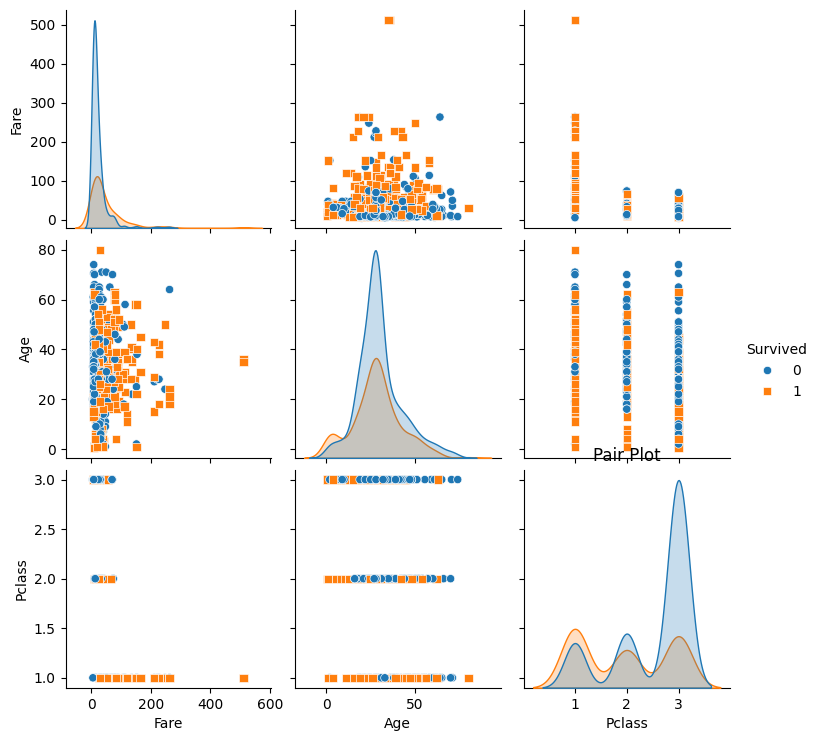

In [23]:
sns.pairplot(df[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

In [24]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,False,True,False,True
1,2,1,38.0,71.2833,2,True,False,False,False
2,3,3,26.0,7.9250,1,True,False,False,True
3,4,1,35.0,53.1000,2,True,False,False,True
4,5,3,35.0,8.0500,1,False,True,False,True


In [25]:
y = titanic.Survived

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [27]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


In [28]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


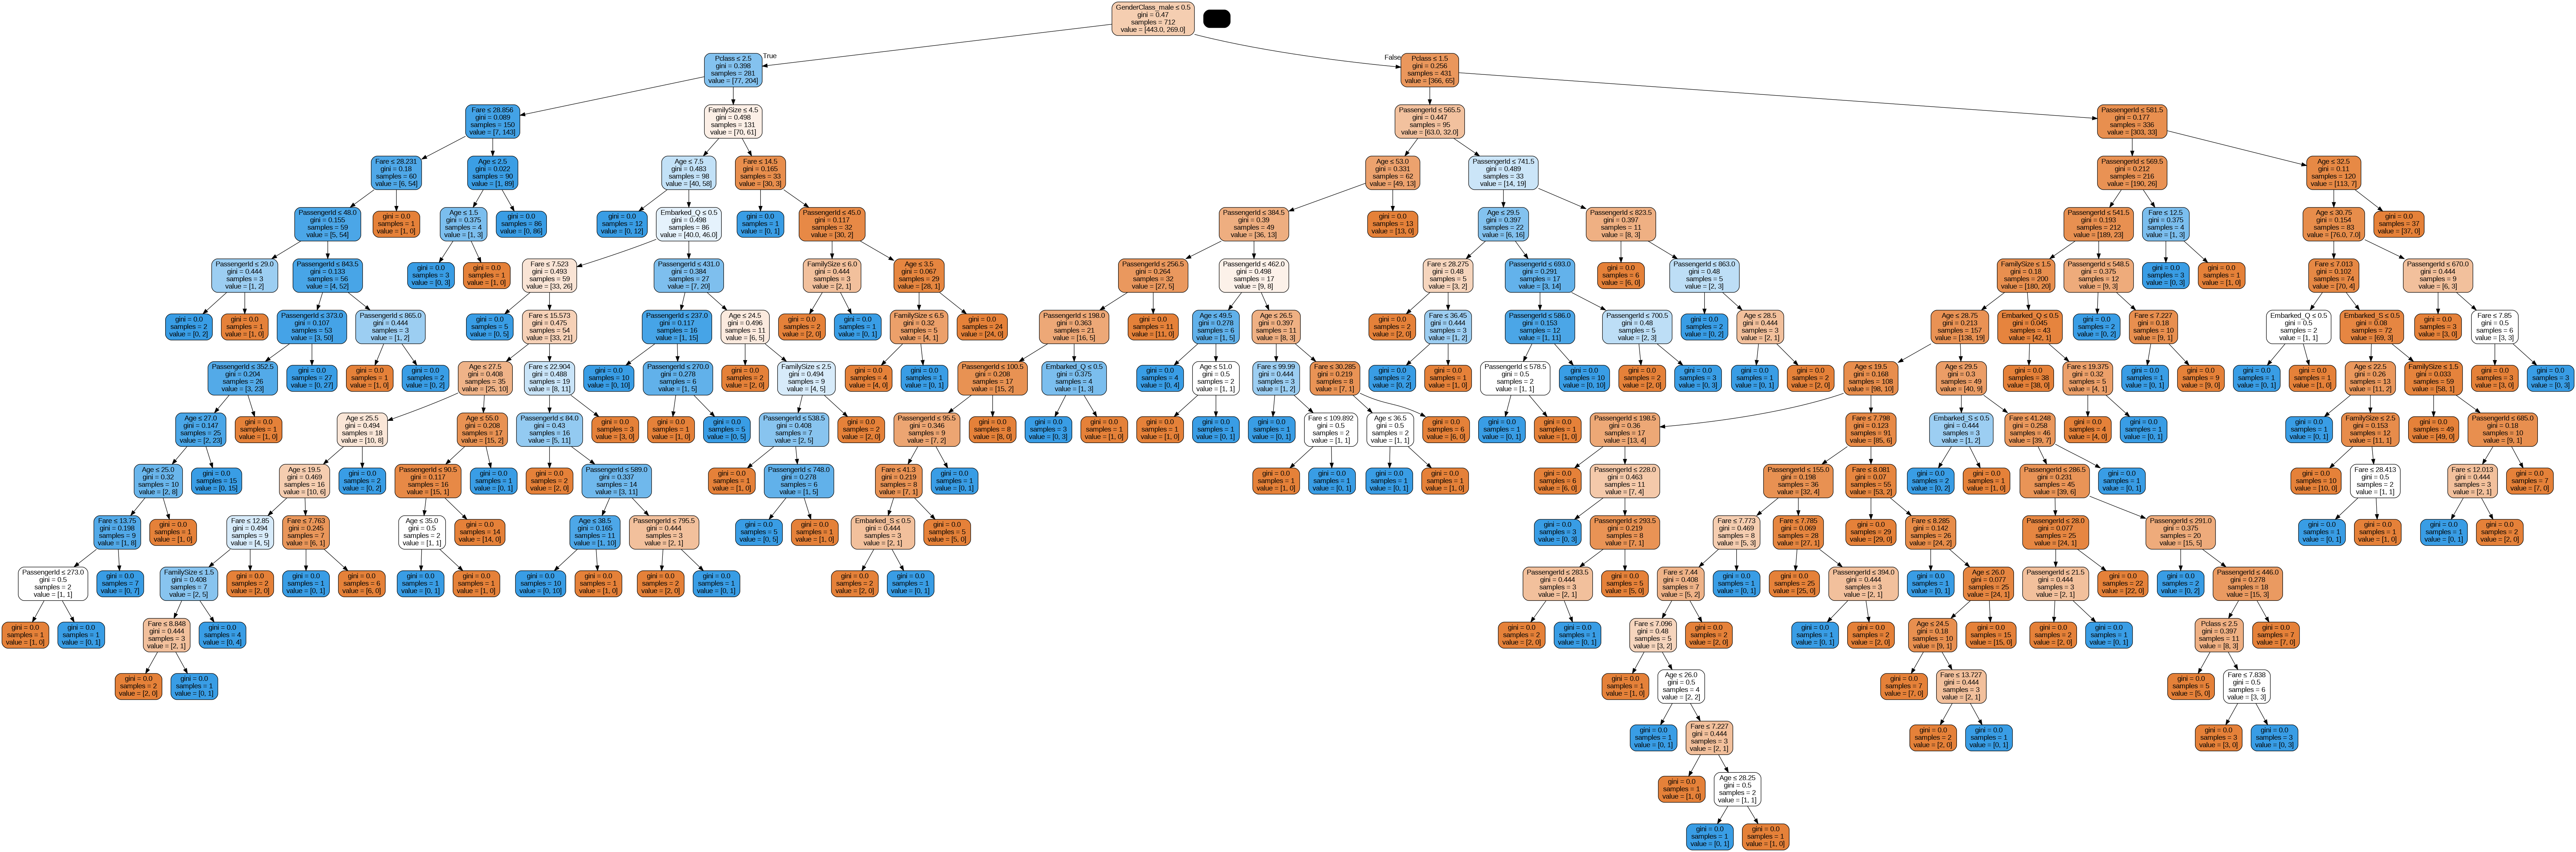

In [30]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True,
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)

Image(graph.create_png())

In [31]:
y_pred_train = model.predict(X_train)

In [32]:
y_pred_test = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.776536312849162


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  88                  18
Actual Survived              22                  51


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]



grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [36]:
y_pred_test1 = grid_search.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.8044692737430168


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              24                  49


In [39]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 3, 'min_samples_split': 2}


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Accuracy of the Random Forest Classifier: {rf_accuracy:.4f}')


Accuracy of the Random Forest Classifier: 0.7877


In [44]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using the trained Decision Tree
sfm = SelectFromModel(model, threshold="mean", max_features=5)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Retrain the model with selected features
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
print(f'Accuracy after feature selection: {accuracy_score(y_test, y_pred_selected):.4f}')


Accuracy after feature selection: 0.7989
